## About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

# Basic Analysis
Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
df=pd.read_csv("F:/Programming/Project/Walmart/walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
df.shape

(550068, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [6]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

## Statistcal Values:

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [8]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [9]:
df['Marital_Status']=df['Marital_Status'].replace((0,1),('Married','Unmarried'))

### Replacing Booleans to Strings/readable values for better readability

## Outlier Detection:

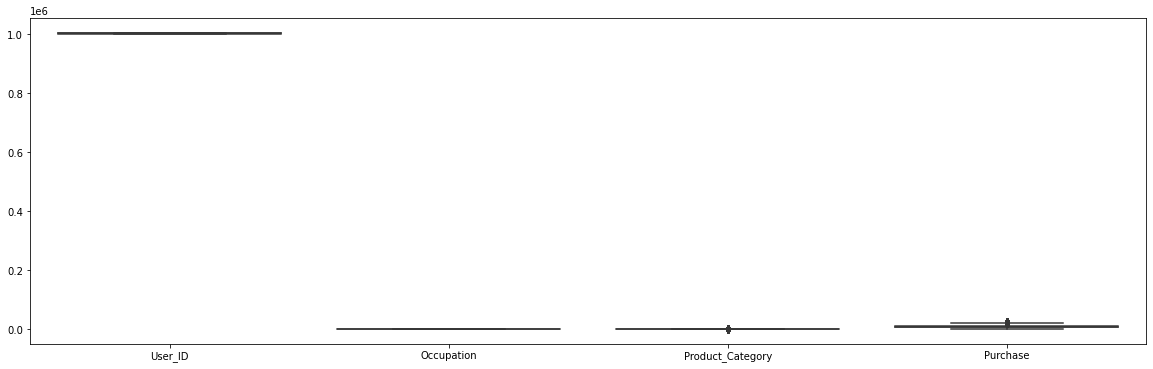

In [10]:
plt.figure(figsize=(20,6))
sns.boxplot(data=df, palette=("Dark2"))
plt.show()

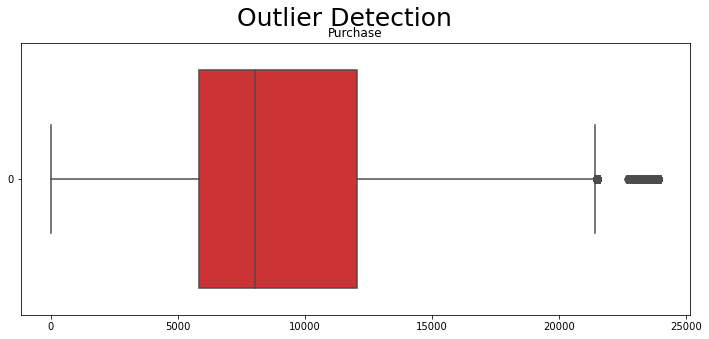

In [11]:
plt.figure(figsize=(12,5)).suptitle('Outlier Detection',fontsize=25)
sns.boxplot(data=df['Purchase'], orient='h', palette=("Set1"))
plt.title('Purchase')

plt.show()

### There are several outliers in the purchase field

In [12]:
def Outlier_dectect(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1 
    outliers = df[(df>(Q3+1.5*IQR)) | ((df<(Q1-1.5*IQR)))]
    return outliers 
outliers = Outlier_dectect(df["Purchase"])
print("Number of Outliers:"+ str(len(outliers)))
print("Max Outlier:"+ str(outliers.max()))
print("Min Outlier: "+ str(outliers.min()))


Number of Outliers:2677
Max Outlier:23961
Min Outlier: 21401


## Statistcal Values After Handling Outliers:

In [13]:
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


# Exploratary Data Analysis:

## Univariate Analysis

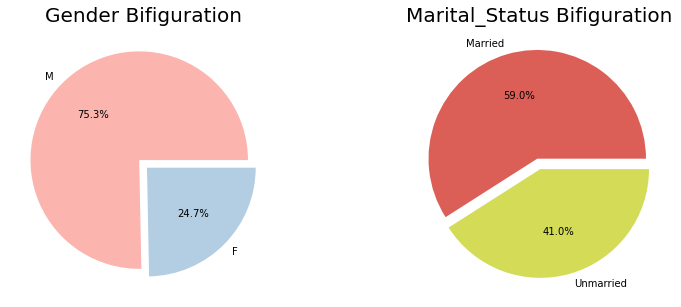

In [14]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.pie(df.Gender.value_counts(), 
        explode=(0.05,0.05), labels=df.Gender.value_counts().index, autopct='%1.1f%%', 
        colors=sns.color_palette('Pastel1'))
plt.title('Gender Bifiguration', fontsize=20)

plt.subplot(1,2,2)
plt.pie(df.Marital_Status.value_counts(), 
        explode=(0.05,0.05), labels=df.Marital_Status.value_counts().index, autopct='%1.1f%%', 
        colors=sns.color_palette('hls'))
plt.title('Marital_Status Bifiguration', fontsize=20)
plt.show()

### Observations: 
**Gender Bifiguration** and **Marital Status Bifiguration**:

1. The data suggests that there are more females than males in the population represented by this chart.  The pie chart titled **Gender Bifiguration** shows that **59%** of the population is female and **41%** is male.

2. The majority of people in the dataset are married.  The pie chart titled **Marital Status Bifiguration** shows that **75.3%** of the population is married.


In [15]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Married,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Married,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Married,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Married,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Married,8,7969


In [16]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

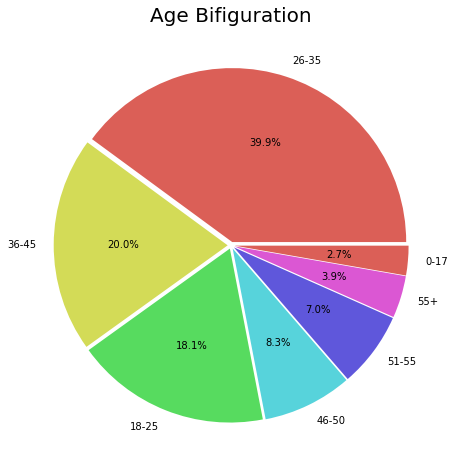

In [17]:
plt.figure(figsize=(15,8))
plt.pie(df.Age.value_counts(), 
        explode=(0.02,0.02,0.02,0.02,0.02,0.02,0.02), labels=df.Age.value_counts().index, autopct='%1.1f%%', 
        colors=sns.color_palette('hls'))
plt.title('Age Bifiguration', fontsize=20)
plt.show()

### Observations:
1. **Age Group Preferences:**
    - The **26-35** age group constitutes the largest segment, representing **39.9%** of the population.
    - The **36-45** age group follows, accounting for **20.0%**.
    - Young adults aged **18-25** make up **18.1%** of the total.

2. **Market Segmentation:**
    - Consider targeted marketing strategies for the **26-35** age group due to its significant representation.
    - Recognize the declining interest in most categories as age increases beyond **35**.


In [18]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

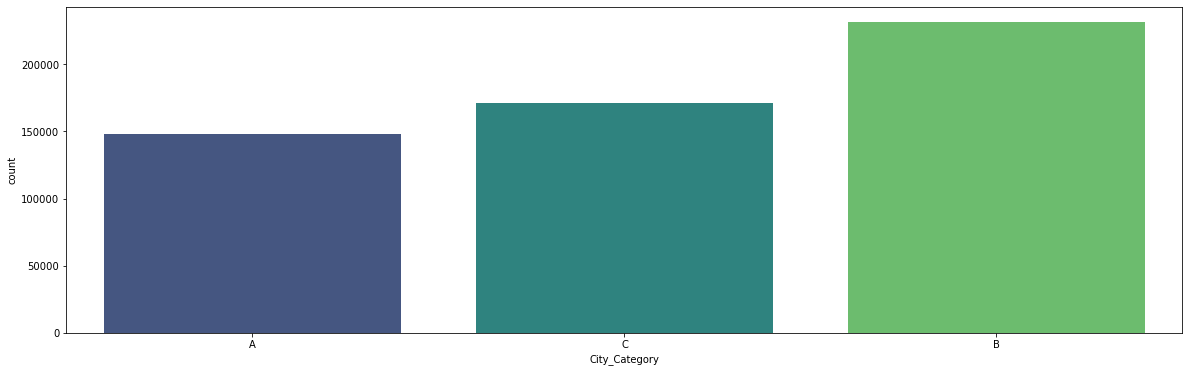

In [19]:
plt.figure(figsize=(20,6))
sns.countplot(data=df, x='City_Category', palette=("viridis"))
plt.show()

# Bivariate Analysis

In [20]:
df.groupby('City_Category').agg(count=('User_ID','count')).reset_index()

,City_Category,count
0,A,147720
1,B,231173
2,C,171175


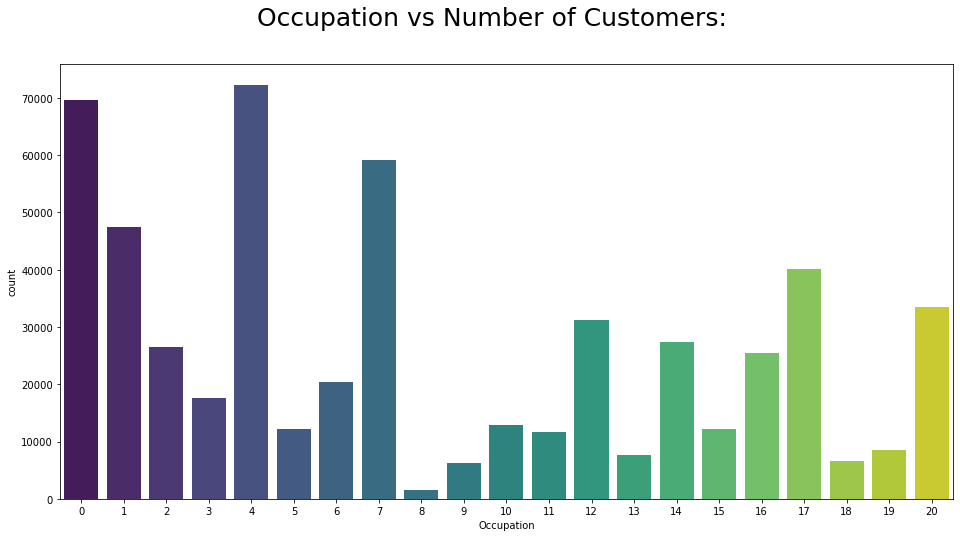

In [21]:
plt.figure(figsize=(16,8)).suptitle('Occupation vs Number of Customers:',fontsize=25)
sns.countplot(x=df['Occupation'], palette=("viridis"))
plt.show()

### Observations and Recommendations:
1. **Occupational Preferences:**
    - Occupations labeled as **0**, **4**, and **7** have significantly higher customer counts.
    - **Occupation 0** stands out with the highest number of customers.
    - Occupations **5**, **6**, and **8-20** exhibit relatively lower customer engagement.

2. **Market Segmentation:**
    - Consider targeted marketing strategies for occupations with lower customer representation.
    - Explore ways to enhance engagement with occupations beyond the top three.

3. **Strategic Opportunities:**
    - Occupation 0's popularity warrants further investigation for potential insights.
    - Leverage data-driven approaches to optimize marketing efforts across different occupations.


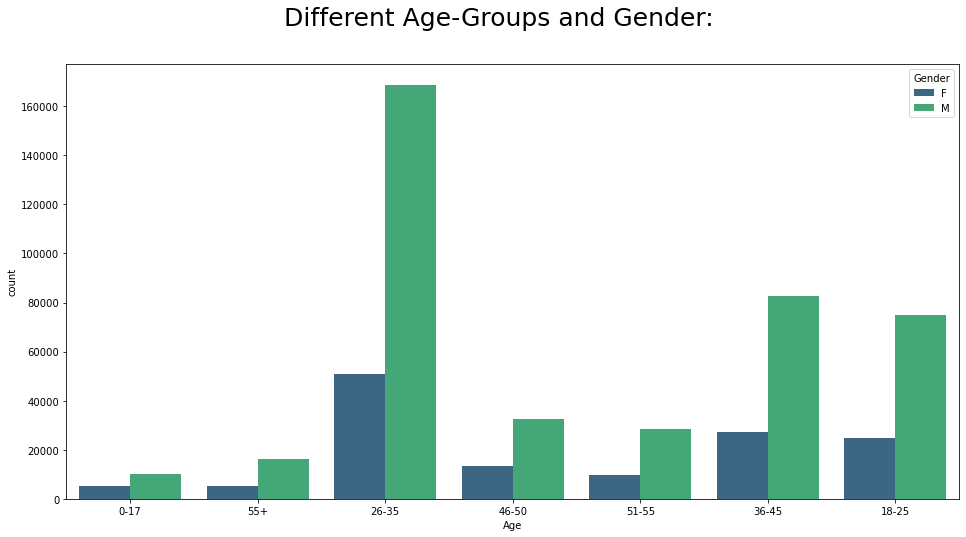

In [22]:
plt.figure(figsize=(16,8)).suptitle('Different Age-Groups and Gender:',fontsize=25)
sns.countplot(data=df, x='Age', hue='Gender', palette=("viridis"))
plt.show()

### Observations and Recommendations:
1. **Age Group Preferences:**
    - The age group **26-35** shows the highest count across both genders.
    - **Females** dominate this age group, indicating their significant presence in consumer behavior.
    - Conversely, the **55+** and **0-17** age groups exhibit lower participation.

2. **Gender Disparity:**
    - **Females** consistently outnumber **males** in all age categories.
    - This gender disparity suggests targeted marketing efforts should consider female preferences.

3. **Age and Market Segmentation:**
    - Tailor marketing strategies based on age demographics.
    - Focus on engaging the **26-35** age group, especially females.
    - Recognize the declining interest in most categories as age increases.


In [23]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [24]:
product_category = df.groupby(['Product_Category','Product_ID']).aggregate(count=('Product_ID','count')).reset_index()
product_category = product_category.groupby(['Product_Category']).aggregate(count=('Product_ID','count')).reset_index()
product_category

,Product_Category,count
0,1,493
1,2,152
2,3,90
3,4,88
4,5,967
5,6,119
6,7,102
7,8,1047
8,9,2
9,10,25


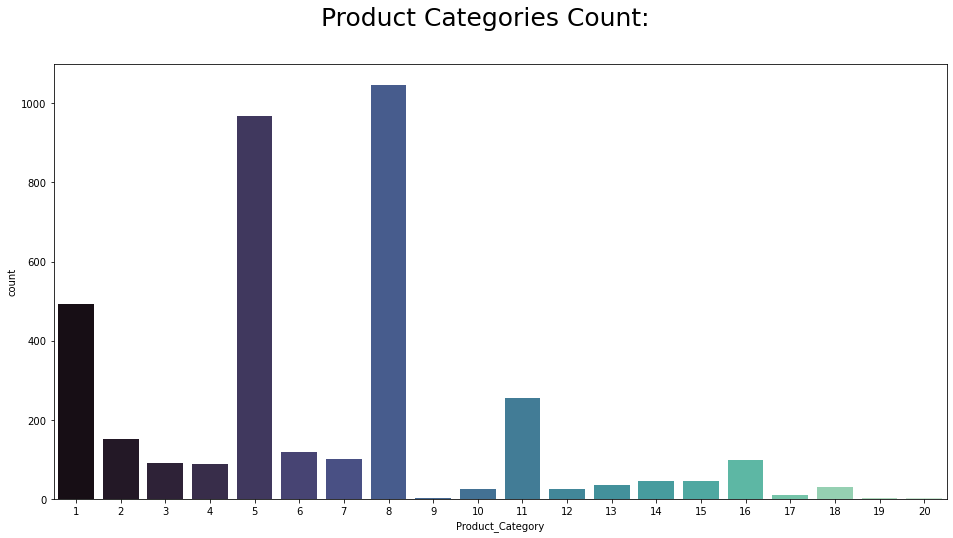

In [25]:
plt.figure(figsize=(16,8)).suptitle('Product Categories Count:',fontsize=25)
sns.barplot(data=product_category,x='Product_Category', y='count', palette=("mako"))
plt.show()

# Multivariate Analysis:

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


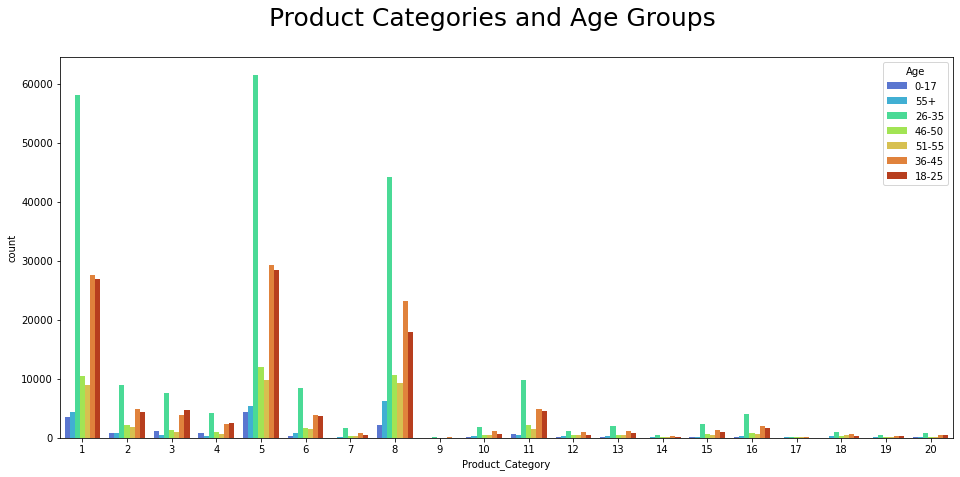

In [26]:
plt.figure(figsize=(16,7)).suptitle('Product Categories and Age Groups',fontsize=25)
sns.countplot(df['Product_Category'], hue=df['Age'], palette=("turbo"))
plt.show()

### Observations and Recommendations:

1. **Product Preferences by Age:**
    - **Product Category 1** is universally popular across all age groups, with a notable peak among consumers aged **0-17**.
    - **Category 7** attracts significant interest from consumers aged **18-35**, indicating its relevance to young adults.
    - **Category 9** also garners attention across various age groups, suggesting its broad appeal.

2. **Age-Related Trends:**
    - As age increases beyond **35**, interest in most product categories declines.
    - Consumers aged **55+** exhibit lower engagement across all categories.

3. **Marketing Implications:**
    - Tailor marketing strategies based on age demographics.
    - Focus on promoting **Category 1** to a diverse audience.
    - Consider targeted campaigns for **Category 7** and **9** to capture specific age segments.


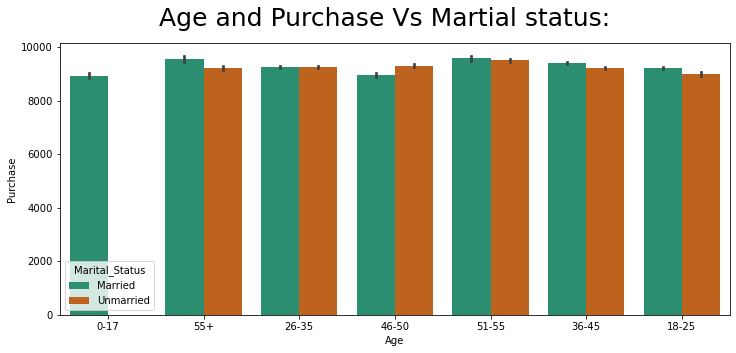

In [27]:
plt.figure(figsize=(12,5)).suptitle('Age and Purchase Vs Martial status:',fontsize=25)
sns.barplot(data=df,x='Age',y='Purchase', hue='Marital_Status', palette=("Dark2"))
plt.show()

### Insights:
- In this plot, a comparison among age, purchase behavior, and marital status indicates that all age groups are equally engaged as buyers, irrespective of marital status.

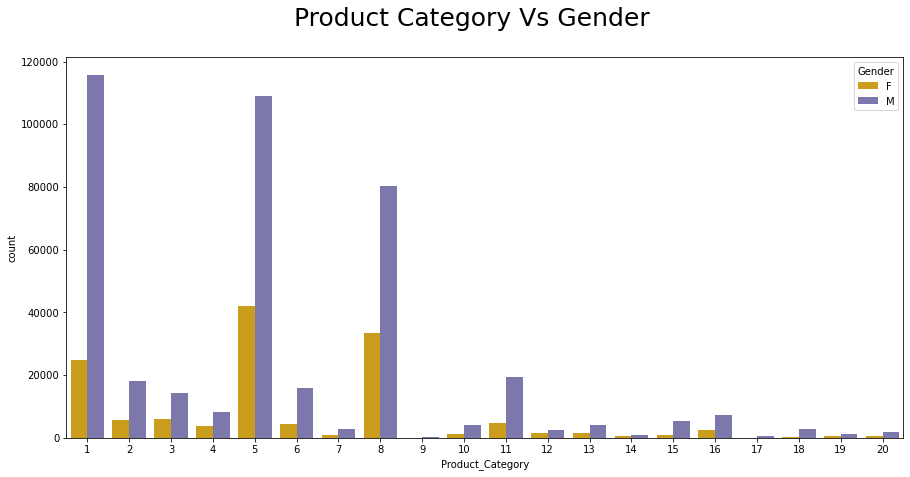

In [28]:
plt.figure(figsize=(15,7)).suptitle("Product Category Vs Gender", fontsize=25)
sns.countplot(data=df, x='Product_Category', hue='Gender', palette=("Dark2_r"))
plt.show()

### Observations:
- The data analysis reveals a notable trend: product categories 1, 5, and 8 exhibit high demand, with male consumers emerging as predominant purchasers across nearly all categories in comparison to females.

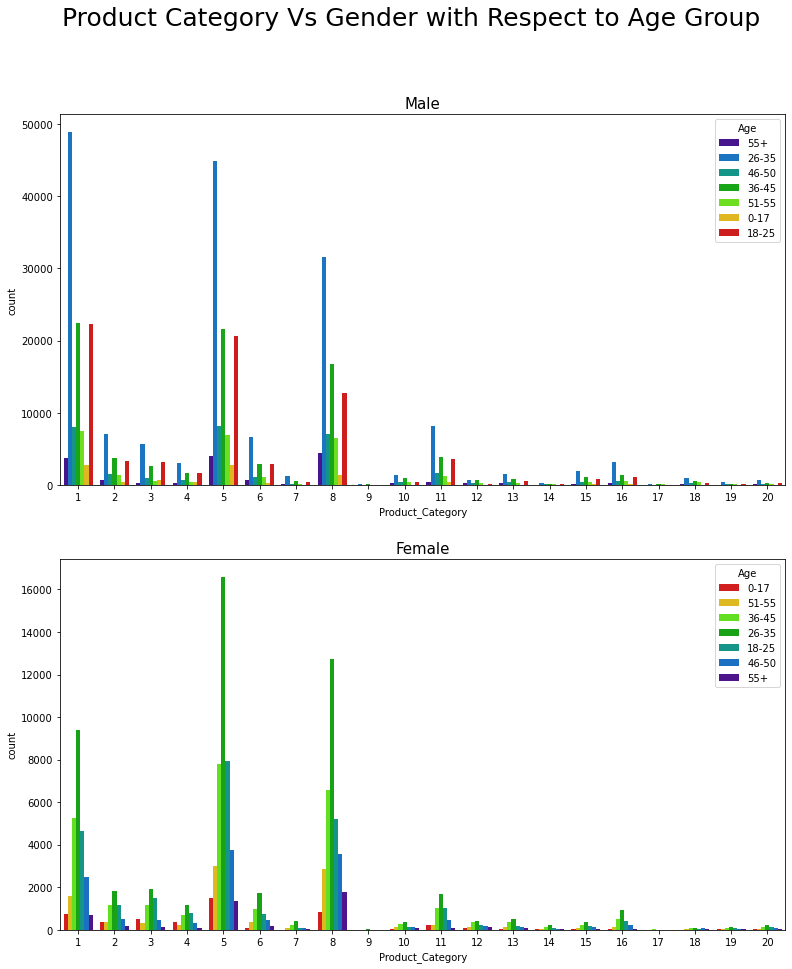

In [29]:
plt.figure(figsize=(13,15)).suptitle('Product Category Vs Gender with Respect to Age Group',fontsize=25)

plt.subplot(2,1,1)
sns.countplot(data=df[df['Gender']=='M'], x='Product_Category', hue='Age', palette=("nipy_spectral"))
plt.title('Male', fontsize=15)

plt.subplot(2,1,2)
sns.countplot(data=df[df['Gender']=='F'], x='Product_Category', hue='Age', palette=("nipy_spectral_r"))
plt.title('Female', fontsize=15)

plt.show()

### Observations:
* **Females tend to purchase more products than males across most age groups.** This is especially true for the younger age groups (0-17 and 18-25). 
* **For females, there is a significant drop in the number of products purchased between the 26-35 and 36-45 age groups.** This could be due to factors such as entering the workforce and having less time for shopping, or a shift in priorities towards childcare or eldercare.
* **For males, the number of products purchased tends to be more consistent across age groups.** There is a slight decrease in the number of products purchased in the 55+ age group, but this is not as pronounced as the decrease seen for females in the 36-45 age group.
* **The specific product categories that are most popular with each gender group are not shown in this plot.** However, we can see that there is a wider variety of product categories purchased by females than by males. This suggests that females may be more likely to shop across a wider range of categories, while males may be more focused on a smaller number of categories.


Overall, the plot suggests that there are some significant differences in purchasing behavior between males and females. Females tend to purchase more products overall, and their purchasing habits change more significantly as they age. It would be interesting to see further analysis of the data to see which product categories are most popular with each gender group.

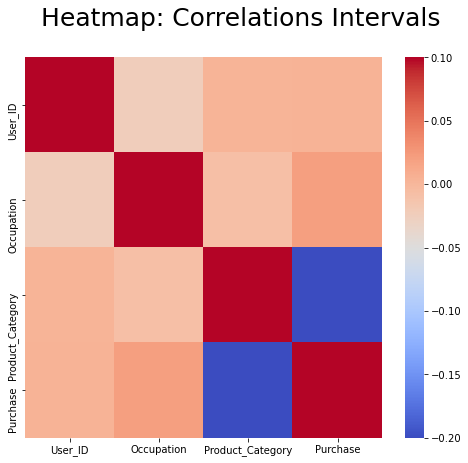

In [30]:
plt.figure(figsize=(8,7)).suptitle('Heatmap: Correlations Intervals',fontsize=25)
sns.heatmap(df.corr(),vmin=-0.2,vmax=0.1, cmap='coolwarm')
plt.show()

### Insights:
- The heatmap shows correlations between User ID, Occupation, Product Category, and Purchase.
- The diagonal from the top left to the bottom right is red, indicating a strong positive correlation of 1 with themselves.
- Notably, there is a negative correlation between Product Category and Purchase, depicted in blue.

## Gender Wise Analysis

In [31]:
Purchase_mean=df.groupby(['User_ID', 'Gender'])['Purchase'].sum().reset_index()
Purchase_mean.head()

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001


In [32]:
Purchase_mean['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

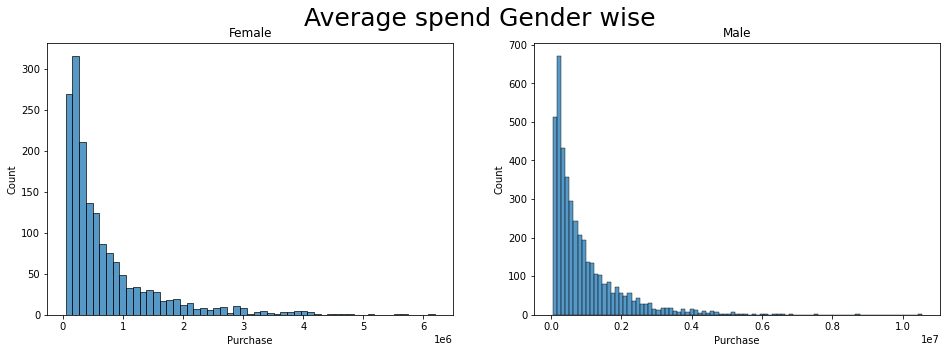

In [33]:
plt.figure(figsize=(16,5)).suptitle('Average spend Gender wise',fontsize=25)

plt.subplot(1,2,1)
sns.histplot(data=Purchase_mean[Purchase_mean['Gender']=='F']['Purchase'], palette=("Set1"))
plt.title("Female")

plt.subplot(1,2,2)
sns.histplot(data=Purchase_mean[Purchase_mean['Gender']=='M']['Purchase'], palette=("Set1"))
plt.title("Male")

plt.show()

### Obervations: 
- As we could see these points are not Normally distributed we need to do the analysis using central limit theorm.

In [34]:
Gen_mean=Purchase_mean.groupby('Gender')['Purchase'].mean().reset_index()
Gen_mean.round(2)

,Gender,Purchase
0,F,712024.39
1,M,925344.40


In [35]:
Mal_mean=Purchase_mean[Purchase_mean['Gender']=='M']
Fem_mean=Purchase_mean[Purchase_mean['Gender']=='F']

## Central Limit Theorem (CLT) over the Gender with Respect to Purchase

In [36]:
Fem_sample = [np.mean(Fem_mean.sample(1500)['Purchase']) for i in range(1000) ]
Mal_sample = [np.mean(Mal_mean.sample(3000)['Purchase']) for i in range(1000) ]

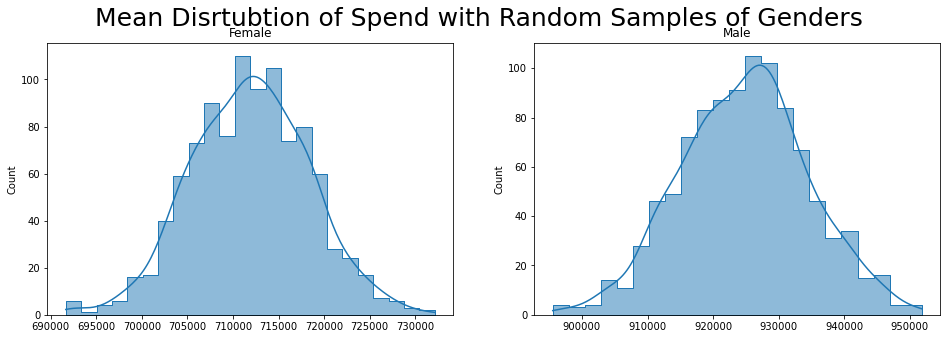

In [37]:
plt.figure(figsize=(16,5)).suptitle("Mean Disrtubtion of Spend with Random Samples of Genders", fontsize=25)

plt.subplot(1,2,1)
sns.histplot(data=Fem_sample, kde=True, element='step', palette=("Set1"))
plt.title('Female')

plt.subplot(1,2,2)
sns.histplot(data=Mal_sample, kde=True, element='step', palette=("Set1"))
plt.title('Male')

plt.show()

### Observations:
- After implementing the Central limit theorm we could see that the points are now normally distributed by which we could do the assumptions alog with the analysis

In [38]:
std_M= np.std(Mal_sample)
std_F= np.std(Fem_sample)
print("Standard Devation of Spend over samples:\n Male:",std_M , "\n Female:", std_F)

Standard Devation of Spend over samples:
 Male: 9686.783496256401 
 Female: 6452.902591597058


In [39]:
Fem_CI=norm.interval(0.95,loc=np.mean(Fem_sample),scale=std_F/np.sqrt(len(Fem_sample)))
Mal_CI=norm.interval(0.95,loc=np.mean(Mal_sample),scale=std_F/np.sqrt(len(Mal_sample)))
print("Confidence Interval for Spend over all samples:\n Male:",Mal_CI , "\n Female:", Fem_CI)

Confidence Interval for Spend over all samples:
 Male: (924403.0865453115, 925202.981939355) 
 Female: (711481.7848689782, 712281.6802630217)


In [40]:
Fem_CI=norm.interval(0.95,loc=np.mean(Fem_sample),scale=std_F/np.sqrt(300))
Mal_CI=norm.interval(0.95,loc=np.mean(Mal_sample),scale=std_F/np.sqrt(300))
print("Confidence Interval for Spend over 300 samples:\nMale:",Mal_CI , "\nFemale:", Fem_CI)

Confidence Interval for Spend over 300 samples:
Male: (924072.8329907298, 925533.2354939367) 
Female: (711151.5313143965, 712611.9338176034)


In [41]:
Fem_CI=norm.interval(0.95,loc=np.mean(Fem_sample),scale=std_F/np.sqrt(3000))
Mal_CI=norm.interval(0.95,loc=np.mean(Mal_sample),scale=std_F/np.sqrt(3000))
print("Confidence Interval for Spend over 3000 samples:\nMale:",Mal_CI , "\nFemale:", Fem_CI)

Confidence Interval for Spend over 3000 samples:
Male: (924572.124331796, 925033.9441528706) 
Female: (711650.8226554627, 712112.6424765373)


## Observations: 
    
1. The confidence interval computed using the entire dataset appears to be wider for both genders compared to the confidence interval computed using 300 samples. This is expected because when using the entire dataset, there is more variability present in the data, leading to wider confidence intervals.

2. The width of the confidence interval is typically affected by the sample size. As the sample size increases, the width of the confidence interval tends to decrease. This is because larger sample sizes provide more information about the population, resulting in more precise estimates and narrower intervals.

3. Yes, the confidence intervals for different sample sizes overlap. Both genders have overlapping intervals for both the entire dataset and the 300 samples. Overlapping confidence intervals suggest that there is no statistically significant difference between the means of the two genders at the chosen confidence level.

4. As the sample size increases, the shape of the distribution of the means tends to become more normally distributed. This phenomenon is described by the Central Limit Theorem, which states that as sample size increases, the distribution of the sample means approaches a normal distribution, regardless of the shape of the population distribution. Therefore, with larger sample sizes, the distribution of the means becomes more symmetric and bell-shaped.


## Maritial Status Wise Analysis:

In [42]:
Marital_Status_mean=df.groupby(['User_ID', 'Marital_Status'])['Purchase'].sum().reset_index()
Marital_Status_mean.head()

,User_ID,Marital_Status,Purchase
0,1000001,Married,334093
1,1000002,Married,810472
2,1000003,Married,341635
3,1000004,Unmarried,206468
4,1000005,Unmarried,821001


In [43]:
Marital_Status_mean['Marital_Status'].value_counts()

Married      3417
Unmarried    2474
Name: Marital_Status, dtype: int64

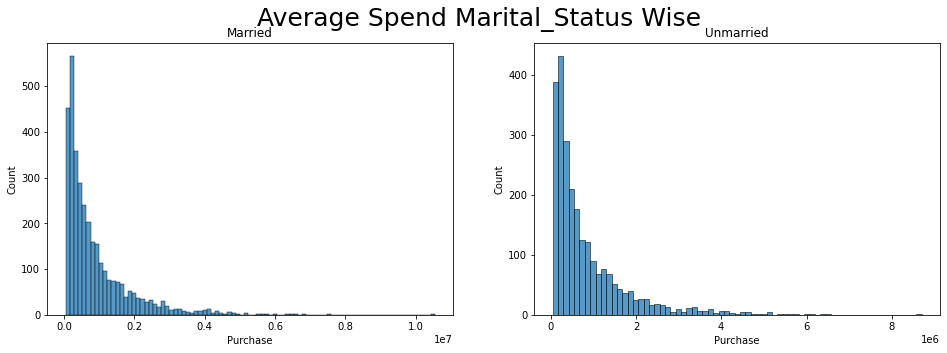

In [44]:
plt.figure(figsize=(16,5)).suptitle('Average Spend Marital_Status Wise',fontsize=25)

plt.subplot(1,2,1)
sns.histplot(data=Marital_Status_mean[Marital_Status_mean['Marital_Status']=='Married']['Purchase'], palette=("Accent2"))
plt.title("Married")

plt.subplot(1,2,2)
sns.histplot(data=Marital_Status_mean[Marital_Status_mean['Marital_Status']=='Unmarried']['Purchase'], palette=("Accen"))
plt.title("Unmarried")

plt.show()

In [45]:
Marital_Status_pur_mean=Marital_Status_mean.groupby('Marital_Status')['Purchase'].mean().reset_index()
Marital_Status_pur_mean.round(2)

,Marital_Status,Purchase
0,Married,880575.78
1,Unmarried,843526.80


## Central Limit Theorem (CLT) over the Maritial Status with Respect to Purchase

In [46]:
Mar_mean=Marital_Status_mean[Marital_Status_mean['Marital_Status']=='Married']
Unmar_mean=Marital_Status_mean[Marital_Status_mean['Marital_Status']=='Unmarried']

In [47]:
Mar_sample = [np.mean(Mar_mean.sample(3000, replace=True)['Purchase']) for i in range(1000) ]
Unmar_sample = [np.mean(Unmar_mean.sample(2500, replace=True)['Purchase']) for i in range(1000) ]


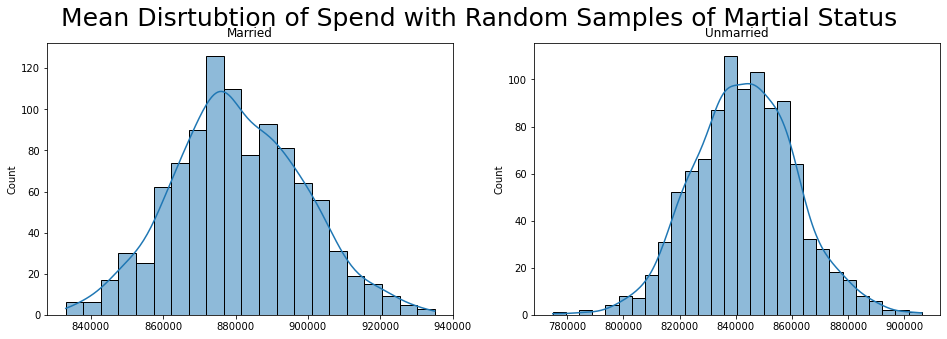

In [48]:
plt.figure(figsize=(16,5)).suptitle("Mean Disrtubtion of Spend with Random Samples of Martial Status", fontsize=25)

plt.subplot(1,2,1)
sns.histplot(data=Mar_sample, kde=True, element='bars', palette=("Accent2"))
plt.title('Married')

plt.subplot(1,2,2)
sns.histplot(data=Unmar_sample, kde=True, element='bars', palette=("Accent2"))
plt.title('Unmarried')

plt.show()

In [49]:
std_Mar= np.std(Mar_sample)
std_Unmar= np.std(Unmar_sample)
print("Standard Devation of Spend over samples:\n Married:",std_Mar , "\n Unmarried:", std_Unmar)

Standard Devation of Spend over samples:
 Married: 17922.322856383784 
 Unmarried: 18170.850015578646


In [50]:
Mar_CI=norm.interval(0.95,loc=np.mean(Mar_sample),scale=std_F/np.sqrt(len(Mar_sample)))
Unmar_CI=norm.interval(0.95,loc=np.mean(Unmar_sample),scale=std_F/np.sqrt(len(Unmar_sample)))
print("Confidience Interval for Spend over all samples:\n Married:",Mar_CI , "\n Unmarried:", Unmar_CI)

Confidience Interval for Spend over all samples:
 Married: (880436.4736839783, 881236.3690780218) 
 Unmarried: (842829.7776861782, 843629.6730802217)


In [51]:
Mar_CI=norm.interval(0.95,loc=np.mean(Mar_sample),scale=std_F/np.sqrt(300))
Unmar_CI=norm.interval(0.95,loc=np.mean(Unmar_sample),scale=std_F/np.sqrt(300))
print("Confidence Interval for Spend over all samples:\n Married:",Mar_CI , "\n Unmarried:", Unmar_CI)

Confidence Interval for Spend over all samples:
 Married: (880106.2201293967, 881566.6226326035) 
 Unmarried: (842499.5241315966, 843959.9266348034)


In [52]:
Mar_CI=norm.interval(0.95,loc=np.mean(Mar_sample),scale=std_F/np.sqrt(3000))
Unmar_CI=norm.interval(0.95,loc=np.mean(Unmar_sample),scale=std_F/np.sqrt(3000))
print("Confidence Interval for Spend over all samples:\n Married:",Mar_CI , "\n Unmarried:", Unmar_CI)

Confidence Interval for Spend over all samples:
 Married: (880605.5114704628, 881067.3312915374) 
 Unmarried: (842998.8154726627, 843460.6352937373)


## Observations: 
Certainly! Here’s a concise and professional rephrasing:

1. The confidence intervals computed using the entire dataset are wider for both marital statuses compared to those computed using specific sample sizes. This is because incorporating more variability from the entire dataset results in wider intervals.

2. Sample size significantly affects the width of confidence intervals. As sample size increases, intervals tend to become narrower. Larger samples provide more precise estimates.

3. The overlapping confidence intervals for different sample sizes indicate no statistically significant difference between the means of the two marital status groups at the chosen confidence level.

Furthermore, as sample size increases, the distribution of means tends to approximate a normal distribution due to the Central Limit Theorem. This leads to a more symmetric and bell-shaped distribution."


## Age Wise Analysis

In [53]:
Age_mean= df.groupby(['User_ID', 'Age'])[['Purchase']].sum().reset_index()
Age_mean.head()

,User_ID,Age,Purchase
0,1000001,0-17,334093
1,1000002,55+,810472
2,1000003,26-35,341635
3,1000004,46-50,206468
4,1000005,26-35,821001


In [54]:
Age_mean['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

In [55]:
Age=df['Age'].unique()
Age=list(Age)
Age

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

## Central Limit Theorem (CLT) over the Age with Respect to Purchase

In [57]:
Age_means = {}

Age_intervals = Age
for Age_grp in Age_intervals:
    Age_means[Age_grp] = []
Age_means

{'0-17': [],
 '55+': [],
 '26-35': [],
 '46-50': [],
 '51-55': [],
 '36-45': [],
 '18-25': []}

In [58]:
for Age_grp in Age_intervals:
    for _ in range(1000):
        mean = df[df['Age']==Age_grp].sample(200, replace=True)['Purchase'].mean()
        Age_means[Age_grp].append(mean)


In [59]:
for i in Age:
    new_df=df[df['Age']==i]
    CI= norm.interval(0.95,loc=new_df['Purchase'].mean(), scale=new_df['Purchase'].std()/np.sqrt(len(new_df)))
    print("For age {} --> confidence interval:{}".format(i, CI))

For age 0-17 --> confidence interval:(8851.947970542686, 9014.981310347262)
For age 55+ --> confidence interval:(9269.29883441773, 9403.262084481079)
For age 26-35 --> confidence interval:(9231.73367640003, 9273.647589339746)
For age 46-50 --> confidence interval:(9163.085142648752, 9254.166252287903)
For age 51-55 --> confidence interval:(9483.991472776577, 9585.624589143894)
For age 36-45 --> confidence interval:(9301.669410965314, 9361.031978870433)
For age 18-25 --> confidence interval:(9138.407948753442, 9200.919263769136)


## Insights:

1. A significant majority, approximately **80%**, of users fall within the age range of **18-50**, with the highest concentration in the **26-35 age group (40%)**, followed by **18-25 (18%)** and **36-45 (20%)**.
2. The user base is predominantly **Male**, comprising **75%** of the total users, with **Females** accounting for the remaining **25%**.
3. Among the users, **60% are single, while 40% are married**.
4. City residency distribution reveals that 35% of users have resided for one year, 18% for two years, and 17% for three years.
5. The dataset encompasses a total of 20 product categories and 20 distinct occupation types.
6. Notably, product categories **1, 5, 8, and 11** demonstrate the highest purchasing frequencies, indicating strong consumer preference for products within these categories.
7. On average, **Male** customers spend approximately **925,344.40**, while **Female** customers spend **712,024.39**.
8. Utilizing the Central Limit Theorem, the 95% confidence intervals for the average spend by male and female customers are estimated as follows:
   - **Male: (925,556.037, 926,341.059)**
   - **Female: (711,662.974, 712,447.996)**
9. Confidence intervals for marital status reveal the following ranges for mean spending:
   - **Married: (806,668.83, 880,384.76)**
   - **Unmarried: (848,741.18, 912,410.38)**
10. Confidence intervals for different age groups suggest variations in spending patterns:
    - **Age 0-17: (8,851.95, 9,014.98)**
    - **Age 55+: (9,269.30, 9,403.26)**
    - **Age 26-35: (9,231.73, 9,273.65)**
    - **Age 46-50: (9,163.09, 9,254.17)**
    - **Age 51-55: (9,483.99, 9,585.62)**
    - **Age 36-45: (9,301.67, 9,361.03)**
    - **Age 18-25: (9,138.41, 9,200.92)**

## Recommendations:

1. Prioritize customer retention strategies targeting male customers, given their higher spending propensity compared to females.
2. Allocate resources towards product categories 1, 5, 8, and 11, which exhibit the highest purchasing frequencies, while also exploring strategies to enhance sales of less popular products.
3. Develop marketing campaigns tailored to unmarried customers, as they tend to spend more than their married counterparts.
4. Focus acquisition efforts on the age demographic of 18-45, which represents the most financially active segment within the user base.
5. Direct marketing initiatives towards male customers residing in City_Category C, as they demonstrate higher spending patterns compared to counterparts in other city categories, thereby potentially increasing revenue streams.